<a href="https://colab.research.google.com/github/RealHumanBean12/Grip-at-spark/blob/main/Student_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [13]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

Importing the data

In [15]:
!wget 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
student_data = pd.read_csv('student_scores - student_scores.csv')

--2021-07-10 10:48:53--  https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212 [text/plain]
Saving to: ‘student_scores - student_scores.csv.1’

student_scores - st 100%[===================>]     212  --.-KB/s    in 0s      

2021-07-10 10:48:53 (12.1 MB/s) - ‘student_scores - student_scores.csv.1’ saved [212/212]



Now to take a look at the data

In [16]:
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [17]:
student_data.shape

(25, 2)

In [19]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking for outliers

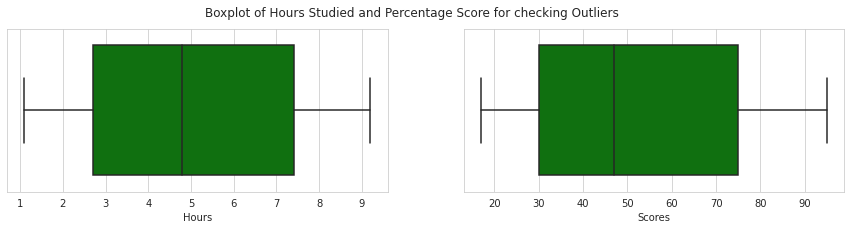

In [20]:
# Checking for Outliers in the data using Boxplot
fig, axes = plt.subplots(1,2, figsize = (15, 3))
fig.suptitle("Boxplot of Hours Studied and Percentage Score for checking Outliers")
sns.set_style('whitegrid')
sns.boxplot(ax = axes[0], x = student_data['Hours'], color = 'green')
sns.boxplot(ax = axes[1], x = student_data['Scores'], color = 'green')
plt.show()

From the above plot the lack of outliers is evident

Now we plot a heatmap to check the relation between the different features

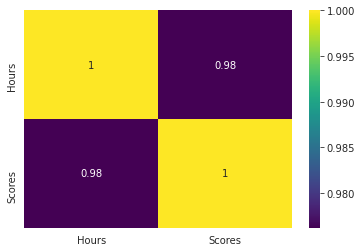

In [21]:
correlation = student_data.corr()
sns.heatmap(correlation, annot = True, cmap = "viridis")

We can see from the above plot that the socres and the hours have an approx. of 0.98 correlation. So it would do well to use the hours studied to predict the scores

Now we plot the data to get a feel for it

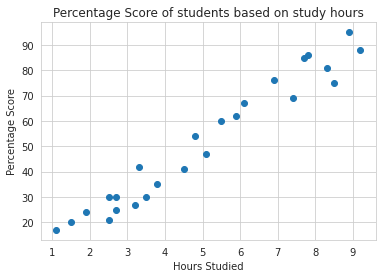

In [24]:
plt.scatter(student_data['Hours'], student_data['Scores'])
plt.title("Percentage Score of students based on study hours")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

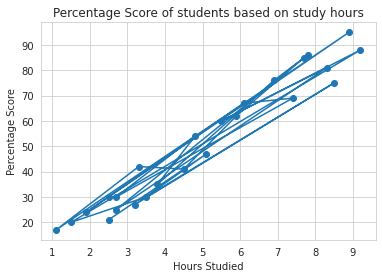

In [25]:
plt.scatter(student_data['Hours'], student_data['Scores'])
plt.plot(student_data['Hours'], student_data['Scores'])
plt.title("Percentage Score of students based on study hours")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Data prep

In [26]:
x = student_data["Hours"].values.reshape(-1,1) 
y = student_data["Scores"].values.reshape(-1,1)

#splitting data into training and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

Model creation

In [27]:
model =  LinearRegression()
model.fit(x_train, y_train)
print("Training completed.\n")

Training completed.



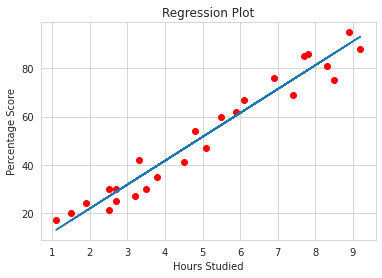

In [28]:
# Plotting the regression line on the Scatter Plot
# y = mx + c
line = (model.coef_*x) + model.intercept_  
# Plotting for the test data
plt.scatter(x, y, c = "Red")
plt.plot(x, line)
plt.title('Regression Plot')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

prediction

In [29]:
# Prediction using the Created Model
# Predicting test Dataset
y_predicted = model.predict(x_test)

evaluation

In [30]:
# Model Evaluation
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_predicted))
print("R2_score : ", r2_score(y_test, y_predicted))

Mean Absolute Error :  4.183859899002982
R2_score :  0.9454906892105354


we can see that we have an accuracy of 94%

In [33]:
#Final prediction
hour = np.array([9.25]).reshape(-1,1)
percentage = model.predict(hour)
percentage = np.round(percentage, decimals = 1)
print(percentage)


[[93.7]]


So studying 9.25hrs a day will yield a 93.7% score